## Data Analysis for IER Paper 2022

**Scripts written by Fernando Corte Vargas**

This Jupyter Notebook contains all the code that I developed for the paper of the course ME41125 - Introduction to Engineering Research. I tried my best to make the code as readable as possible, as it is structured in cells so that you can individually run all the different parts yourself. I also provide an explanation of what I am doing in each cell and provide some preliminary conclusions. Please refer to the paper for the detailed analysis on results.

First off, we will need to import a few packages. Make sure that you have these included in your base Anaconda installation so that the code below runs smoothly. If not, you should be able to install these by running ```conda install [name of the package]``` on your terminal.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from plotnine import *

We load the data that will be used for the analysis. You can find the data set on Brightspace under Content > Topic-Specific Content > Dataset. Due to sensivity of the data, the data set is not included in the GitHub repository, so make sure you download it and put it in the same directory as this Jupyter Notebook.

In [2]:
data = pd.read_csv('Data_IER_2022.csv', delimiter=',', encoding='latin1', na_values='NA', index_col='ID')

We then take a quick look at the data to see what we are dealing with.

In [3]:
# take a look at the data
data.head()

,year,gender,bmi,living,stap_est,erv_fa_sub1_q,erv_fa_sub2_q,erv_fa,dag_zwa1,tijd_zwa1_uur,...,ipaqtot2,tijd_zit2_uur,tijd_zit2_min,wear_1,wear_2,wear_3,wear_4,wear_5,wear_6,wear_7
ID,,,,,,,,,,,,,,,,,,,,,
1,2019,Female,18.0,Moved_out,NaN,3.0,2.0,2.5,2.0,2.0,...,NaN,7.0,30.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,2019,Female,24.9,Moved_out,5000.0,1.0,2.0,1.5,0.0,NaN,...,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,2019,Female,21.8,Moved_out,6500.0,6.0,2.0,4.0,2.0,1.0,...,9795.0,9.0,NaN,Yes,Yes,No,Yes,No,Yes,Yes
4,2019,Female,18.7,Living_with_parents,5000.0,1.0,2.0,1.5,1.0,1.0,...,744.0,10.0,NaN,Yes,Yes,Yes,No,Yes,Yes,Yes
5,2019,Male,27.8,Living_with_parents,NaN,7.0,7.0,7.0,5.0,2.0,...,NaN,4.0,NaN,No,No,No,No,Yes,Yes,Yes


Looks like we have 102 columns. We probably will not need all of them, so we will make a choice later which ones to keep for the sake of simplicity.

In [4]:
data.info()
print()
print("The shape of the data is", data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 290
Columns: 102 entries, year to wear_7
dtypes: float64(70), int64(1), object(31)
memory usage: 233.4+ KB

The shape of the data is (290, 102)


We have 290 samples. Since the data set is not very large, we will probably have to check whether we can perform hypothesis testing using one-way ANOVA. We will first take a look at some descriptive statistics of the quantitative columns of the data set:

In [5]:
data.describe()

,year,bmi,stap_est,erv_fa_sub1_q,erv_fa_sub2_q,erv_fa,dag_zwa1,tijd_zwa1_uur,tijd_zwa1_min,dag_mat1,...,tijd_zwa2_min,dag_mat2,tijd_mat2_uur,tijd_mat2_min,dag_wan2,tijd_wan2_uur,tijd_wan2_min,ipaqtot2,tijd_zit2_uur,tijd_zit2_min
count,290.000000,278.000000,264.000000,286.000000,286.000000,286.000000,285.000000,227.000000,197.000000,284.000000,...,142.000000,268.000000,203.000000,198.000000,268.000000,176.000000,216.000000,240.000000,259.000000,122.000000
mean,2020.010345,21.258957,5763.121212,4.129371,4.006993,4.068182,2.014035,1.211454,19.269036,4.753521,...,21.330986,4.373134,1.583744,22.358586,4.022388,1.346591,23.226852,3272.776667,7.783784,7.270492
std,0.812891,2.331746,2146.115991,1.646062,1.489126,1.440541,1.482223,0.769583,15.218266,1.876719,...,15.095310,2.034061,4.788123,14.401343,2.192826,3.799141,12.856974,3223.598739,3.245684,13.581731
min,2019.000000,16.600000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,19.700000,5000.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,3.000000,...,0.000000,3.000000,0.000000,15.000000,2.000000,0.000000,15.000000,1428.000000,6.000000,0.000000
50%,2020.000000,21.000000,6000.000000,4.000000,4.000000,4.000000,2.000000,1.000000,30.000000,5.000000,...,30.000000,5.000000,1.000000,30.000000,4.000000,0.000000,20.000000,2421.750000,7.000000,0.000000
75%,2021.000000,22.600000,7000.000000,5.000000,5.000000,5.000000,3.000000,1.000000,30.000000,6.000000,...,30.000000,6.000000,1.000000,30.000000,6.000000,1.000000,30.000000,3861.250000,9.000000,0.000000
max,2021.000000,32.000000,14000.000000,7.000000,7.000000,7.000000,7.000000,8.000000,50.000000,7.000000,...,60.000000,7.000000,50.000000,50.000000,7.000000,30.000000,50.000000,26640.000000,40.000000,45.000000


We have 71 quantitative columns. We will now try to make a selection of which columns to keep for our analysis. We print a list with all the columns to evaluate this:

In [6]:
print(data.columns)

Index(['year', 'gender', 'bmi', 'living', 'stap_est', 'erv_fa_sub1_q',
       'erv_fa_sub2_q', 'erv_fa', 'dag_zwa1', 'tijd_zwa1_uur',
       ...
       'ipaqtot2', 'tijd_zit2_uur', 'tijd_zit2_min', 'wear_1', 'wear_2',
       'wear_3', 'wear_4', 'wear_5', 'wear_6', 'wear_7'],
      dtype='object', length=102)


The list is far too large. Upon inspection of the PDF document on Brightspace "Explanation of the fitbit dataset", we make a decision to keep only the following columns: year, BMI, estimated steps, perception score, attitude score, social perception score, and a mean of the measured steps per day by the application and the fitbit device.

In [7]:
# here we do some more data preprocessing
# first we calculate the average number of steps measured by the app/fitbit.

data['stap_om_mean'] = (data['stap_om_1_aantal'] + data['stap_om_2_aantal'] + \
                        data['stap_om_3_aantal'] + data['stap_om_4_aantal'] + \
                        data['stap_om_5_aantal'] + data['stap_om_6_aantal'] + \
                        data['stap_om_7_aantal']) / 7

data['stap_app_mean'] = (data['stap_app_1_aantal'] + data['stap_app_2_aantal'] + \
                        data['stap_app_3_aantal'] + data['stap_app_4_aantal'] + \
                        data['stap_app_5_aantal'] + data['stap_app_6_aantal'] + \
                        data['stap_app_7_aantal']) / 7

# we only keep the data that we consider relevant 
# and discard the remaining columns

columns_to_keep = ['year', 'bmi', 'stap_est', 'erv_fa', 'attitu_tot', 'soc_omg_tot', 'stap_om_mean', 'stap_app_mean']

data = data[columns_to_keep]

Next, we need to make a decision on how we will handle the missing data. We can either fill in NA values in a column with the median, or drop the NA samples that do not report an attitude & perception score.

Upon inspection, we see that only two samples do not contain a attitude & perception score. Therefore, to maintain as much of the data as possible, we decide to fill missing values with the median of their respective column.

In [8]:
data = data.fillna(data.median()) # UNCOMMENT THIS TO FILL MISSING VALUES WITH MEDIAN
# data = data.dropna(subset=['attitu_tot', 'erv_fa']) # UNCOMMENT THIS TO DROP SAMPLES WITH NO ATTITUDE/PERCEPTION SCORES

# show number on non-null samples per column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 290
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           290 non-null    int64  
 1   bmi            290 non-null    float64
 2   stap_est       290 non-null    float64
 3   erv_fa         290 non-null    float64
 4   attitu_tot     290 non-null    float64
 5   soc_omg_tot    290 non-null    float64
 6   stap_om_mean   290 non-null    float64
 7   stap_app_mean  290 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.4 KB


And we check to see whether we have any NA values in the dataset, as a sanity check.

In [9]:
print(data.isna().any().any())

False


Next, we remove some outliers by means of the Z-score. Any sample whose absolute Z-score of the attitude, perception or social perception scores is greater than 3 is considered an outlier. We thus remove those samples from the data set and save the clean data to a CSV file for later use. We check how many samples we have remaining.

In [10]:
data_clean = data[(np.abs(sp.stats.zscore(data.attitu_tot)) < 3)]
data_clean = data_clean[(np.abs(sp.stats.zscore(data_clean.erv_fa)) < 3)]
data_clean = data_clean[(np.abs(sp.stats.zscore(data_clean.soc_omg_tot)) < 3)]

data_clean.to_csv('data_clean.csv')

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 1 to 290
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           286 non-null    int64  
 1   bmi            286 non-null    float64
 2   stap_est       286 non-null    float64
 3   erv_fa         286 non-null    float64
 4   attitu_tot     286 non-null    float64
 5   soc_omg_tot    286 non-null    float64
 6   stap_om_mean   286 non-null    float64
 7   stap_app_mean  286 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.1 KB


We have thus gotten rid of 4 outliers in the data set. Next, we will try to evaluate the distribution of the most important features for our analysis, which correspond to the perception score, the attitude score, and the social perception score.

First, we plot a histogram of the perception scores across all years and fit a density function.

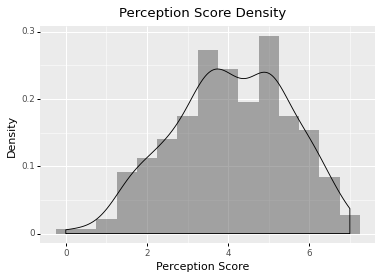

<ggplot: (359145400)>

In [11]:
ggplot(data_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) +\
    labs(title = "Perception Score Density",
         y = "Density", x = "Perception Score")

It seems that the perception score might be normally distributed, due to its bell shape. We will have to confirm this later by means of a Shapiro-Wilk test.

Next, we plot a histogram and density function of the attitude scores.

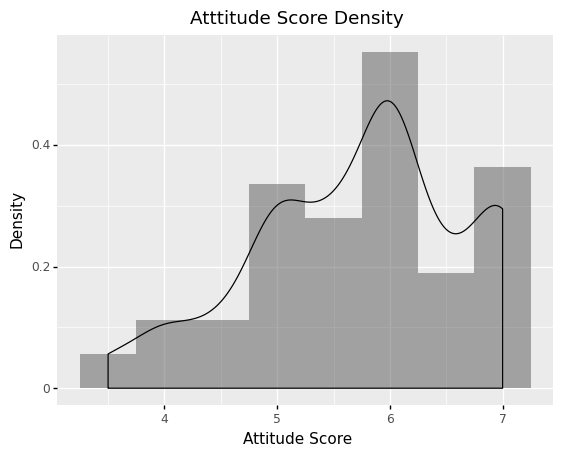

<ggplot: (359255143)>

In [12]:
ggplot(data_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) +\
    labs(title = "Atttitude Score Density",
         y = "Density", x = "Attitude Score")

It is unclear whether the attitude score is drawn from a normal distribution. Intuitively, one might conclude that it is not, since it clearly does not follow a bell-like shape. However, this plot includes the data of all 3 years (2019, 2020 and 2021), so we will first have to inspect whether this score could be a multimodal distribution, from which normal distributions might be extracted. We will also perform the Shapiro-Wilk test to make a conclusion on whether or not there is significant evidence to conclude that they are normally distributed.

We proceed to do the same for the social perception scores:

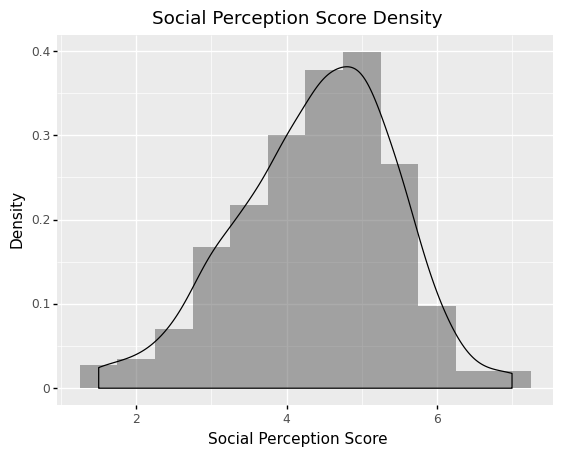

<ggplot: (359157140)>

In [13]:
ggplot(data_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) +\
    labs(title = "Social Perception Score Density",
         y = "Density", x = "Social Perception Score")

Again, we observe that the social perception score is bell-like shaped. Thus, it might be normally distributed, but we will need to perform the Shapiro-Wilk test to confirm this.

We define the following function, which uses the Shapiro-Wilk test to calculate the p-value for the hypothesis test, which tests the null hypothesis that the data was drawn from a normal distribution. If the p-value is less than the chosen significance level (here $\alpha=0.05$), we reject the null hypothesis to conclude that the data is not normally distributed. Else, we fail to reject the null hypothesis and conclude that there is significant evidence to conclude that the data is normally distributed.

In [14]:
def check_normality(data):
    test_stat_normality, p_value_normality = sp.stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

Another assumption necessary for the one-way ANOVA (analysis of variance) is the assumption of homoscedasticity. This means that the variances of the populations that the samples come from are equal. To evaluate this, we use Levene's test, which tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test in the case where there are significant deviations from normality.

In [15]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= sp.stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var < 0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")      

We then proceed to evaluate the normality of the data. As can be seen from the results, none of the features have a normal distribution. Therefore, we will need to evaluate whether slicing the data set by year will result in normally distributed samples. Otherwise, the one-way ANOVA cannot be used as the hypothesis test to determine whether or not there is a statistically significant difference between the means of three or more independent groups.

In [16]:
print('Checking normality of the perception data')
check_normality(data_clean.erv_fa.to_numpy())
print()

print('Checking normality of the attitude data')
check_normality(data_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the social perception data')
check_normality(data_clean.soc_omg_tot.to_numpy())
print()

Checking normality of the perception data
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Checking normality of the social perception data
p value:0.0000
Reject null hypothesis >> The data is not normally distributed



We thus proceed to slice the data set by year:

In [17]:
data_2019_clean = data_clean[data_clean.year==2019]
data_2020_clean = data_clean[data_clean.year==2020]
data_2021_clean = data_clean[data_clean.year==2021]

And we evaluate the average number of samples per year. As it can be seen, the data sets of each year are more or less equal in size.

In [18]:
# calculate the average samples per year
average_samples_per_year = np.array([data_2019_clean.index.size, data_2020_clean.index.size, data_2021_clean.index.size]).mean()
print("On average, there were", average_samples_per_year.round(2), "samples per year.")

On average, there were 95.33 samples per year.


And we print some descriptive statistics of the perception scores per year to get a feeling of the spread of the data.

In [19]:
print('Perception statistics 2019')
print(data_2019_clean.erv_fa.describe())
print()

print('Perception statistics 2020')
print(data_2020_clean.erv_fa.describe())
print()

print('Perception statistics 2021')
print(data_2021_clean.erv_fa.describe())
print()

Perception statistics 2019
count    93.000000
mean      4.290323
std       1.504202
min       0.500000
25%       3.500000
50%       4.500000
75%       5.500000
max       7.000000
Name: erv_fa, dtype: float64

Perception statistics 2020
count    98.000000
mean      3.795918
std       1.367586
min       0.000000
25%       3.000000
50%       3.500000
75%       5.000000
max       6.500000
Name: erv_fa, dtype: float64

Perception statistics 2021
count    95.000000
mean      4.178947
std       1.383635
min       1.000000
25%       3.250000
50%       4.500000
75%       5.250000
max       7.000000
Name: erv_fa, dtype: float64



We do the same for the attitude scores:

In [20]:
print('Attitude statistics 2019')
print(data_2019_clean.attitu_tot.describe())
print()

print('Attitude statistics 2020')
print(data_2020_clean.attitu_tot.describe())
print()

print('Attitude statistics 2021')
print(data_2021_clean.attitu_tot.describe())
print()

Attitude statistics 2019
count    93.000000
mean      5.817204
std       0.855878
min       3.500000
25%       5.000000
50%       6.000000
75%       6.500000
max       7.000000
Name: attitu_tot, dtype: float64

Attitude statistics 2020
count    98.000000
mean      5.576531
std       0.953431
min       3.500000
25%       5.000000
50%       5.500000
75%       6.000000
max       7.000000
Name: attitu_tot, dtype: float64

Attitude statistics 2021
count    95.000000
mean      5.789474
std       0.958109
min       3.500000
25%       5.000000
50%       6.000000
75%       6.500000
max       7.000000
Name: attitu_tot, dtype: float64



And for the social perception scores per year as well:

In [21]:
print('Social perception statistics 2019')
print(data_2019_clean.soc_omg_tot.describe())
print()

print('Social perception statistics 2020')
print(data_2020_clean.soc_omg_tot.describe())
print()

print('Social perception statistics 2021')
print(data_2021_clean.soc_omg_tot.describe())
print()

Social perception statistics 2019
count    93.000000
mean      4.564516
std       0.986941
min       2.500000
25%       4.000000
50%       4.500000
75%       5.000000
max       7.000000
Name: soc_omg_tot, dtype: float64

Social perception statistics 2020
count    98.000000
mean      4.158163
std       1.059072
min       1.500000
25%       3.500000
50%       4.500000
75%       5.000000
max       6.000000
Name: soc_omg_tot, dtype: float64

Social perception statistics 2021
count    95.000000
mean      4.452632
std       1.067094
min       1.500000
25%       4.000000
50%       4.500000
75%       5.000000
max       7.000000
Name: soc_omg_tot, dtype: float64



At first glance, we cannot conclude whether there is a significant change in median or mean of these samples through the years. We thus must perform a hypothesis test to evaluate whether these scores changed from year to year.

We now proceed to plot the histogram of the perception, attitude and social perception score of 2019:

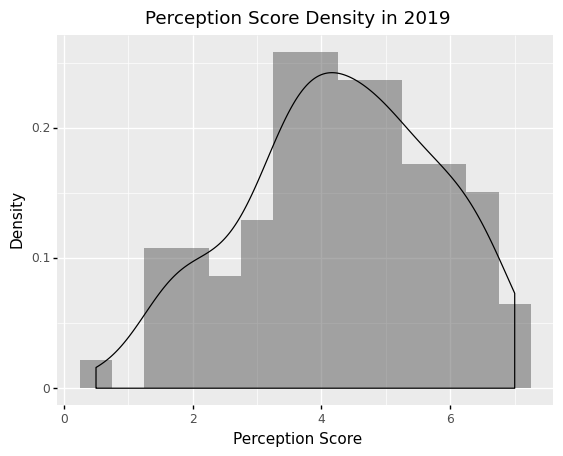

<ggplot: (359322275)>

In [22]:
ggplot(data_2019_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) +\
    labs(title = "Perception Score Density in 2019",
         y = "Density", x = "Perception Score")

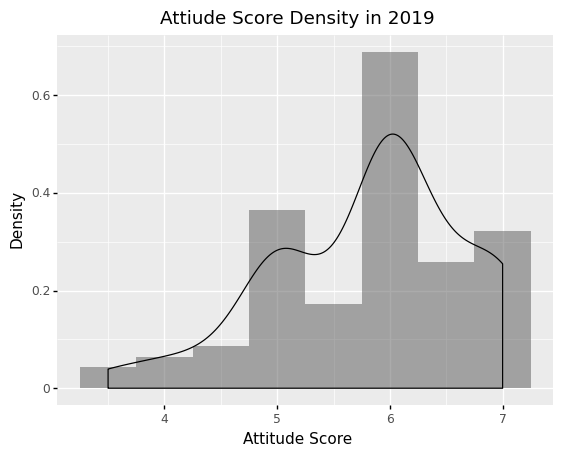

<ggplot: (359358311)>

In [23]:
ggplot(data_2019_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) +\
    labs(title = "Attiude Score Density in 2019",
         y = "Density", x = "Attitude Score")

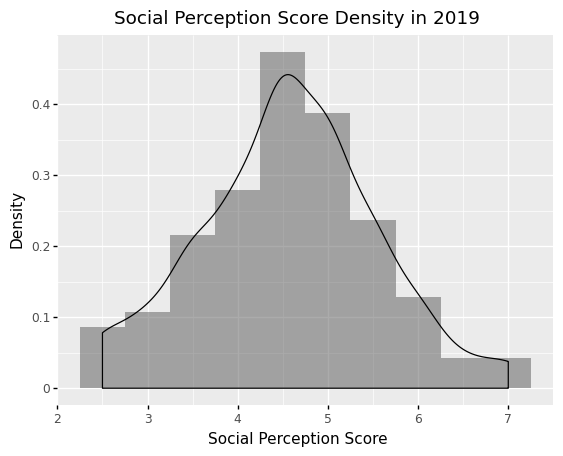

<ggplot: (359286007)>

In [24]:
ggplot(data_2019_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) + \
    labs(title = "Social Perception Score Density in 2019",
         y = "Density", x = "Social Perception Score")

We do the same for the year 2020:

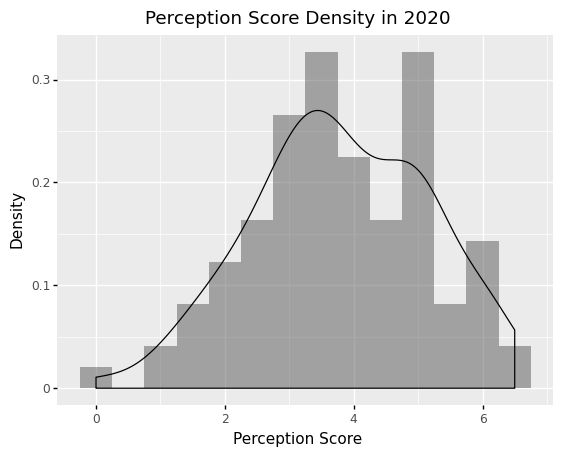

<ggplot: (359433978)>

In [25]:
ggplot(data_2020_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) + \
    labs(title = "Perception Score Density in 2020",
         y = "Density", x = "Perception Score")

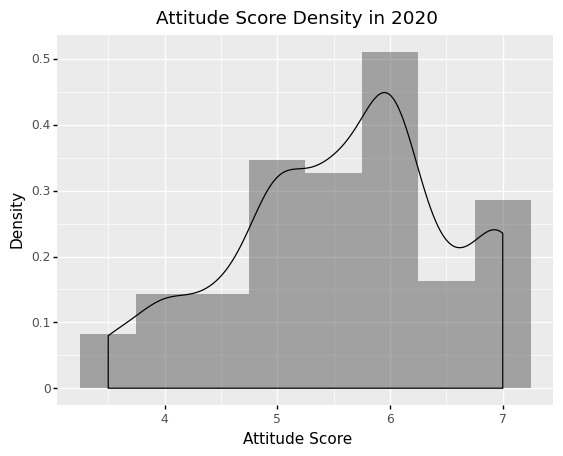

<ggplot: (359472147)>

In [26]:
ggplot(data_2020_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) + \
    labs(title = "Attitude Score Density in 2020",
         y = "Density", x = "Attitude Score")

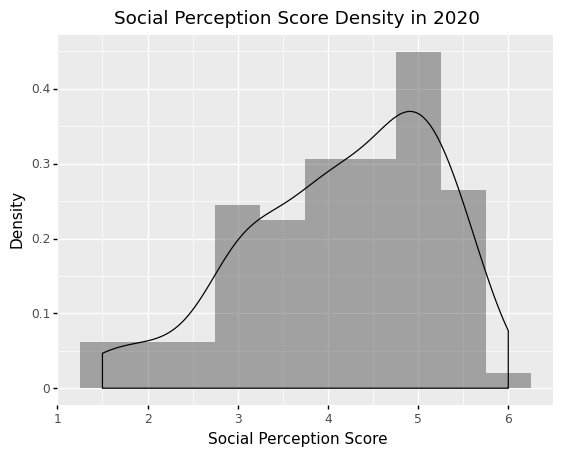

<ggplot: (359508209)>

In [27]:
ggplot(data_2020_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25)  + \
    labs(title = "Social Perception Score Density in 2020",
         y = "Density", x = "Social Perception Score")

And for 2021:

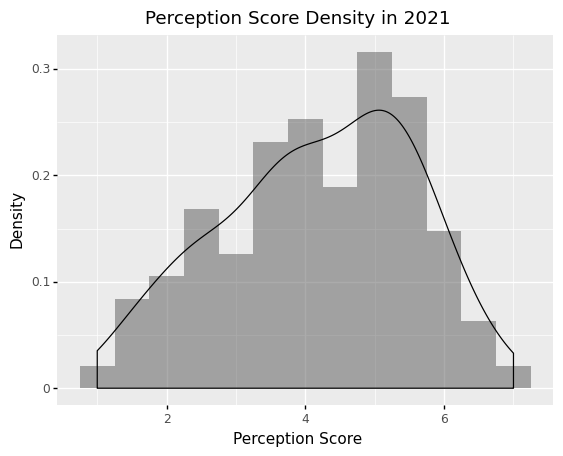

<ggplot: (359549413)>

In [28]:
ggplot(data_2021_clean, aes('erv_fa')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) + \
    labs(title = "Perception Score Density in 2021",
         y = "Density", x = "Perception Score")

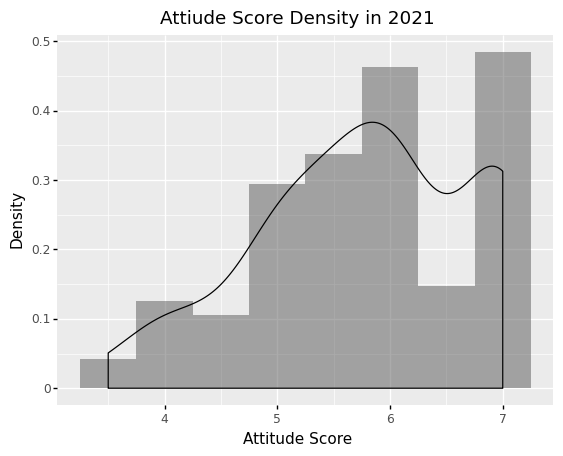

<ggplot: (359583208)>

In [29]:
ggplot(data_2021_clean, aes('attitu_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) + \
    labs(title = "Attiude Score Density in 2021",
         y = "Density", x = "Attitude Score")

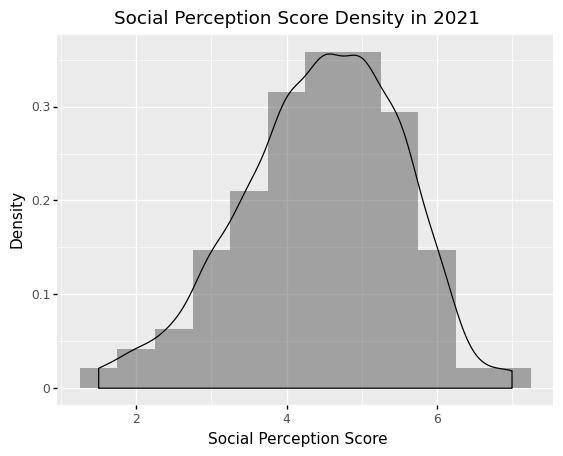

<ggplot: (359620855)>

In [30]:
ggplot(data_2021_clean, aes('soc_omg_tot')) + \
    geom_histogram(aes(y = after_stat('density')),
                   binwidth = 0.5, alpha = 0.5, position = 'identity') + \
    geom_density(alpha = .25) + \
    labs(title = "Social Perception Score Density in 2021",
         y = "Density", x = "Social Perception Score")

From the plots, it does not follow clearly whether the spread of each of the samples is normally distributed. Therefore, we perform the Shapiro-Wilk test once more to make a conclusion:

In [31]:
print('PERCEPTION DATA')
print()

print('Checking normality of the perception data in 2019')
check_normality(data_2019_clean.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2020')
check_normality(data_2020_clean.erv_fa.to_numpy())
print()

print('Checking normality of the perception data in 2021')
check_normality(data_2021_clean.erv_fa.to_numpy())
print()

print('ATTITUDE DATA')
print()

print('Checking normality of the attitude data in 2019')
check_normality(data_2019_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2020')
check_normality(data_2020_clean.attitu_tot.to_numpy())
print()

print('Checking normality of the attitude data in 2021')
check_normality(data_2021_clean.attitu_tot.to_numpy())
print()

print('SOCIAL PERCEPTION DATA')
print()

print('Checking normality of the social perception data in 2019')
check_normality(data_2019_clean.soc_omg_tot.to_numpy())
print()

print('Checking normality of the social perception data in 2020')
check_normality(data_2020_clean.soc_omg_tot.to_numpy())
print()

print('Checking normality of the social perception data in 2021')
check_normality(data_2021_clean.soc_omg_tot.to_numpy())
print()

PERCEPTION DATA

Checking normality of the perception data in 2019
p value:0.0558
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2020
p value:0.0904
Fail to reject null hypothesis >> The data is normally distributed

Checking normality of the perception data in 2021
p value:0.0165
Reject null hypothesis >> The data is not normally distributed

ATTITUDE DATA

Checking normality of the attitude data in 2019
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2020
p value:0.0003
Reject null hypothesis >> The data is not normally distributed

Checking normality of the attitude data in 2021
p value:0.0000
Reject null hypothesis >> The data is not normally distributed

SOCIAL PERCEPTION DATA

Checking normality of the social perception data in 2019
p value:0.0373
Reject null hypothesis >> The data is not normally distributed

Checking normality of the social

From these tests, we can observe that only the perception scores samples of the year 2019 and 2020 are normally distributed. We therefore cannot use the one-way ANOVA test to evaluate whether there is a statistically significant difference between the corresponding population means. Therefore, we make a decision to employ the Kruskal-Wallis test, which is the non-parametric alternative to the one-way ANOVA. Non-parametric means that the test does not assume your data comes from a particular distribution. The H test is used when the assumptions for ANOVA are not met (like the assumption of normality).

However, Kruskal-Wallis still requires variance homogeneity. Thus, we employ Levene's test to evaluate whether variance homogeneity exists across independent groups:

In [32]:
print('PERCEPTION DATA')

print('Checking variance homogeneity of the perception data in 2019 and 2020')
check_variance_homogeneity(data_2019_clean.erv_fa.to_numpy(), data_2020_clean.erv_fa.to_numpy())
print()

print('Checking variance homogeneity of the perception data in 2020 and 2021')
check_variance_homogeneity(data_2020_clean.erv_fa.to_numpy(), data_2021_clean.erv_fa.to_numpy())
print()

print('Checking variance homogeneity of the perception data in 2019 and 2021')
check_variance_homogeneity(data_2019_clean.erv_fa.to_numpy(), data_2021_clean.erv_fa.to_numpy())
print()

print('ATTITUDE DATA')
print()

print('Checking variance homogeneity of the attitude data in 2019 and 2020')
check_variance_homogeneity(data_2019_clean.attitu_tot.to_numpy(), data_2020_clean.attitu_tot.to_numpy())
print()

print('Checking variance homogeneity of the attitude data in 2020 and 2021')
check_variance_homogeneity(data_2020_clean.attitu_tot.to_numpy(), data_2021_clean.attitu_tot.to_numpy())
print()

print('Checking variance homogeneity of the attitude data in 2019 and 2021')
check_variance_homogeneity(data_2019_clean.attitu_tot.to_numpy(), data_2021_clean.attitu_tot.to_numpy())
print()

print('SOCIAL PERCEPTION DATA')
print()

print('Checking variance homogeneity of the social perception data in 2019 and 2020')
check_variance_homogeneity(data_2019_clean.soc_omg_tot.to_numpy(), data_2020_clean.soc_omg_tot.to_numpy())
print()

print('Checking variance homogeneity of the social perception data in 2020 and 2021')
check_variance_homogeneity(data_2020_clean.soc_omg_tot.to_numpy(), data_2021_clean.soc_omg_tot.to_numpy())
print()

print('Checking variance homogeneity of the social perception data in 2019 and 2021')
check_variance_homogeneity(data_2019_clean.soc_omg_tot.to_numpy(), data_2021_clean.soc_omg_tot.to_numpy())
print()

PERCEPTION DATA
Checking variance homogeneity of the perception data in 2019 and 2020
p value:0.3905
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the perception data in 2020 and 2021
p value:0.7365
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the perception data in 2019 and 2021
p value:0.5891
Fail to reject null hypothesis >> The variances of the samples are same.

ATTITUDE DATA

Checking variance homogeneity of the attitude data in 2019 and 2020
p value:0.1072
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the attitude data in 2020 and 2021
p value:0.9811
Fail to reject null hypothesis >> The variances of the samples are same.

Checking variance homogeneity of the attitude data in 2019 and 2021
p value:0.1289
Fail to reject null hypothesis >> The variances of the samples are same.

SOCIAL PERCEPTION DAT

We fail to reject all null hypotheses, which means that the assumption that the variances of the samples is equal is met. We may therefore employ Kruskal-Wallis to test the null hypothesis (H0): he median is equal across all independent groups.

For this, we implement the following function. Similar to the  Shapiro-Wilk, this function calculates the p-value for the hypothesis test. If the p-value is less than the chosen significance level (here $\alpha=0.05$), we reject the null hypothesis to conclude that there is a statistically significant difference between the medians of the three independent groups (which in this case are the scores per year):

In [33]:
def hypothesis_test(group_1, group_2, group_3):
    test_stat_hypothesis, p_value_hypothesis = sp.stats.kruskal(group_1, group_2, group_3)
    print("p value: %.4f" % p_value_hypothesis)
    if p_value_hypothesis < 0.05:
        print("Reject null hypothesis >> The median score is not equal across all groups")
    else:
        print("Fail to reject null hypothesis >> The median score is equal across all groups")

Finally, we run the tests to make a conclusion:

In [34]:
print('PERCEPTION DATA')
print()

# groups here are the perception scores per year
group_1 = data_2019_clean.erv_fa.to_numpy()
group_2 = data_2020_clean.erv_fa.to_numpy()
group_3 = data_2021_clean.erv_fa.to_numpy()

print('Testing  hypothesis of change in perception scores across years')
hypothesis_test(group_1, group_2, group_3)
print()

print('ATTITUDE DATA')
print()

# groups here are the perception scores per year
group_1 = data_2019_clean.attitu_tot.to_numpy()
group_2 = data_2020_clean.attitu_tot.to_numpy()
group_3 = data_2021_clean.attitu_tot.to_numpy()

print('Testing  hypothesis of change in attitude scores across years')
hypothesis_test(group_1, group_2, group_3)
print()

print('SOCIAL PERCEPTION DATA')
print()

# groups here are the perception scores per year
group_1 = data_2019_clean.soc_omg_tot.to_numpy()
group_2 = data_2020_clean.soc_omg_tot.to_numpy()
group_3 = data_2021_clean.soc_omg_tot.to_numpy()

print('Testing  hypothesis of change in social perception scores across years')
hypothesis_test(group_1, group_2, group_3)

PERCEPTION DATA

Testing  hypothesis of change in perception scores across years
p value: 0.0402
Reject null hypothesis >> The median score is not equal across all groups

ATTITUDE DATA

Testing  hypothesis of change in attitude scores across years
p value: 0.1532
Fail to reject null hypothesis >> The median score is equal across all groups

SOCIAL PERCEPTION DATA

Testing  hypothesis of change in social perception scores across years
p value: 0.0743
Fail to reject null hypothesis >> The median score is equal across all groups


As it is observed, we can conclude with 95% confidence that there is significant evidence to support the claim that the median score for the perception score is not equal across all years. For the attitude and the social score however, we fail to reject the null hypothesis, which means that we do not have sufficient evidence to conclude whether there is a difference in median attitude and social perception scores across years.